In [1]:
dat <- read.csv('~/data/R/activity.csv', header = T)

In [2]:
dat1<-na.omit(dat)
head(dat1)

,steps,date,interval
289,0,2012-10-02,0
290,0,2012-10-02,5
291,0,2012-10-02,10
292,0,2012-10-02,15
293,0,2012-10-02,20
294,0,2012-10-02,25


In [3]:
nrow(dat1)

[1] 15264

In [4]:
(30+31)*24*60/5

[1] 17568

In [5]:
tail(dat1)

,steps,date,interval
17275,0,2012-11-29,2330
17276,0,2012-11-29,2335
17277,0,2012-11-29,2340
17278,0,2012-11-29,2345
17279,0,2012-11-29,2350
17280,0,2012-11-29,2355


In [6]:
date<-seq(as.Date("2012-10-02"),as.Date("2012-11-29"),by="1 day")

In [7]:
class(date)

[1] "Date"

In [8]:
sdate<-as.character(date)
vec<-vector(length=length(sdate))

In [9]:
library(plyr)
sumdat<-ddply(dat1, "date", summarise, tsteps=sum(steps))
head(sumdat)

,date,tsteps
1,2012-10-02,126
2,2012-10-03,11352
3,2012-10-04,12116
4,2012-10-05,13294
5,2012-10-06,15420
6,2012-10-07,11015


In [10]:
sum2<-aggregate(.~date,data=dat1, FUN=sum)
tail(sum2)

,date,steps,interval
48,2012-11-24,14478,339120
49,2012-11-25,11834,339120
50,2012-11-26,11162,339120
51,2012-11-27,13646,339120
52,2012-11-28,10183,339120
53,2012-11-29,7047,339120


In [11]:
days<-as.POSIXct(sum2$date)
class(days)

[1] "POSIXct" "POSIXt"

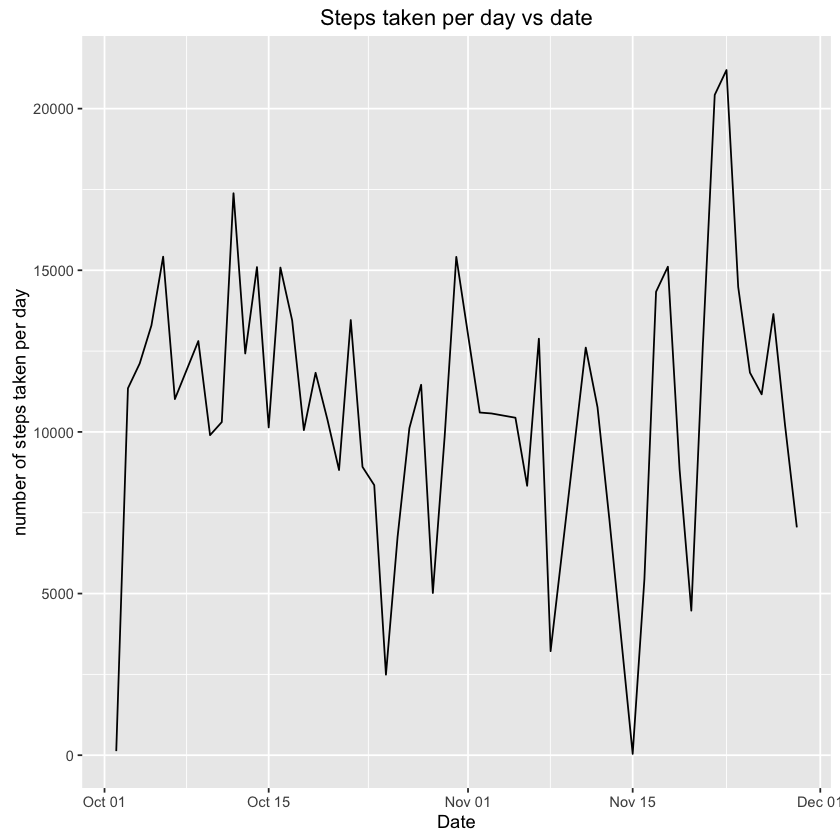

In [12]:
library(ggplot2)
ggplot(data=sum2,aes(x=days,y=steps))+geom_line()+xlab('Date')+ylab('number of steps taken per day')+
ggtitle('Steps taken per day vs date')

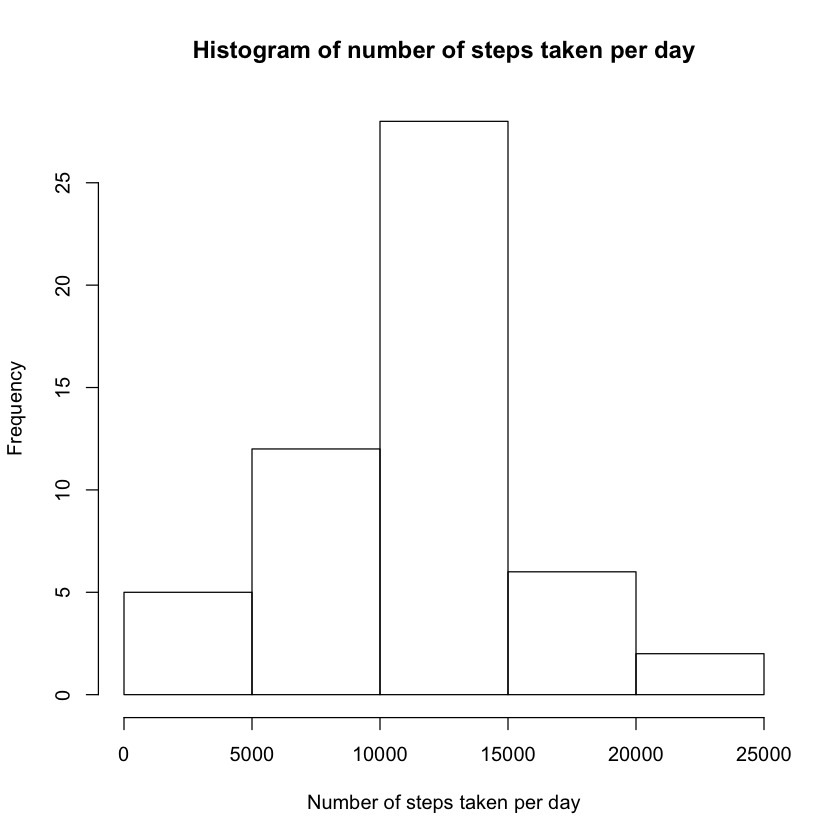

In [13]:
hist(sum2$steps,xlab='Number of steps taken per day',main='Histogram of number of steps taken per day')

In [14]:
mean(sum2$steps)

[1] 10766.19

In [15]:
median(sum2$steps)

[1] 10765

In [16]:
sum3<-aggregate(.~interval,data=dat1, FUN=sum)
sum3$steps<-sum3$steps/53

In [17]:
head(sum3)

,interval,steps,date
1,0,1.716981,1628
2,5,0.3396226,1628
3,10,0.1320755,1628
4,15,0.1509434,1628
5,20,0.0754717,1628
6,25,2.09434,1628


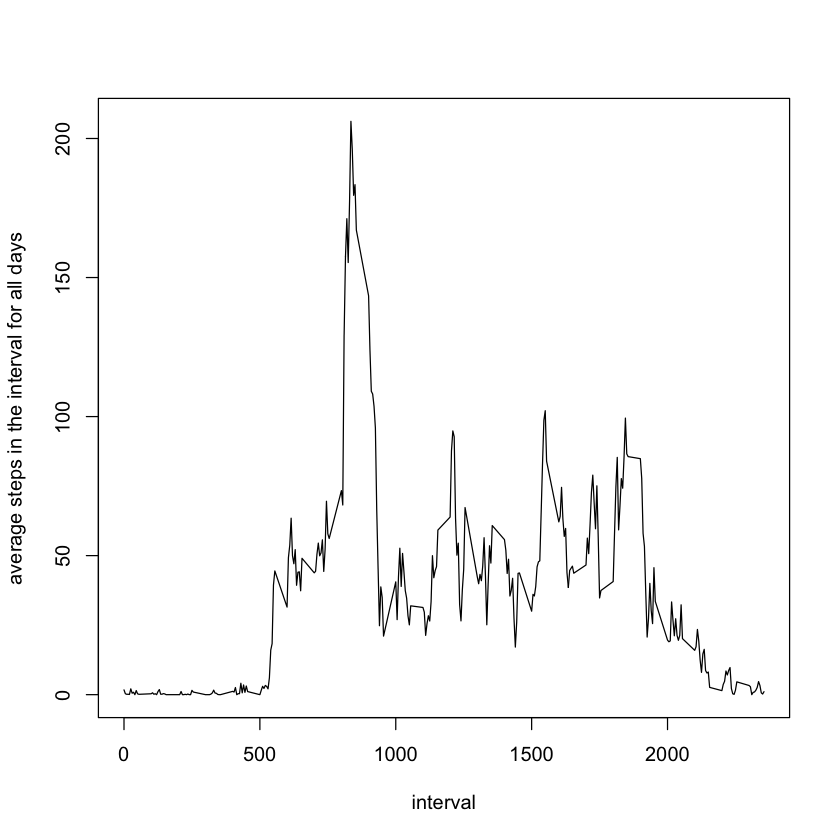

In [18]:
plot(sum3$interval, sum3$steps,type='l',xlab='interval',ylab='average steps in the interval for all days')

In [19]:
max(sum3$steps)
which.max(sum3$steps)

[1] 206.1698

[1] 104

In [20]:
nrow(sum3)

[1] 288

In [21]:
sum3[104,]

,interval,steps,date
104,835,206.1698,1628


In [22]:
sum(is.na(dat$steps))

[1] 2304

In [23]:
nrow(dat)

[1] 17568

In [24]:
nrow(dat1)

[1] 15264

In [25]:
#for (i in sum3$interval){
#    if (i==sum3$interval)
#    dat[which(is.na(dat$steps)),dat$steps]<-sum3[$interval,i]
#    }

In [26]:
#r<-merge(dat,sum3,by='interval')
#na.idx = which(is.na(dat$steps))
#dat[na.idx,"steps"] = r[na.idx,"steps.sum3"]

In [27]:
steps.na <- dat$interval[is.na(dat$steps)]

In [28]:
index <- sapply(steps.na, function(x) which(sum3$interval == x))

In [29]:
dat$steps[is.na(dat$steps)] <- sum3$steps[index]

In [30]:
head(dat)

,steps,date,interval
1,1.716981,2012-10-01,0
2,0.3396226,2012-10-01,5
3,0.1320755,2012-10-01,10
4,0.1509434,2012-10-01,15
5,0.0754717,2012-10-01,20
6,2.09434,2012-10-01,25


In [31]:
head(sum3)

,interval,steps,date
1,0,1.716981,1628
2,5,0.3396226,1628
3,10,0.1320755,1628
4,15,0.1509434,1628
5,20,0.0754717,1628
6,25,2.09434,1628


In [32]:
sum4<-aggregate(.~date,data=dat, FUN=sum)
head(sum4)

,date,steps,interval
1,2012-10-01,10766.19,339120
2,2012-10-02,126,339120
3,2012-10-03,11352,339120
4,2012-10-04,12116,339120
5,2012-10-05,13294,339120
6,2012-10-06,15420,339120


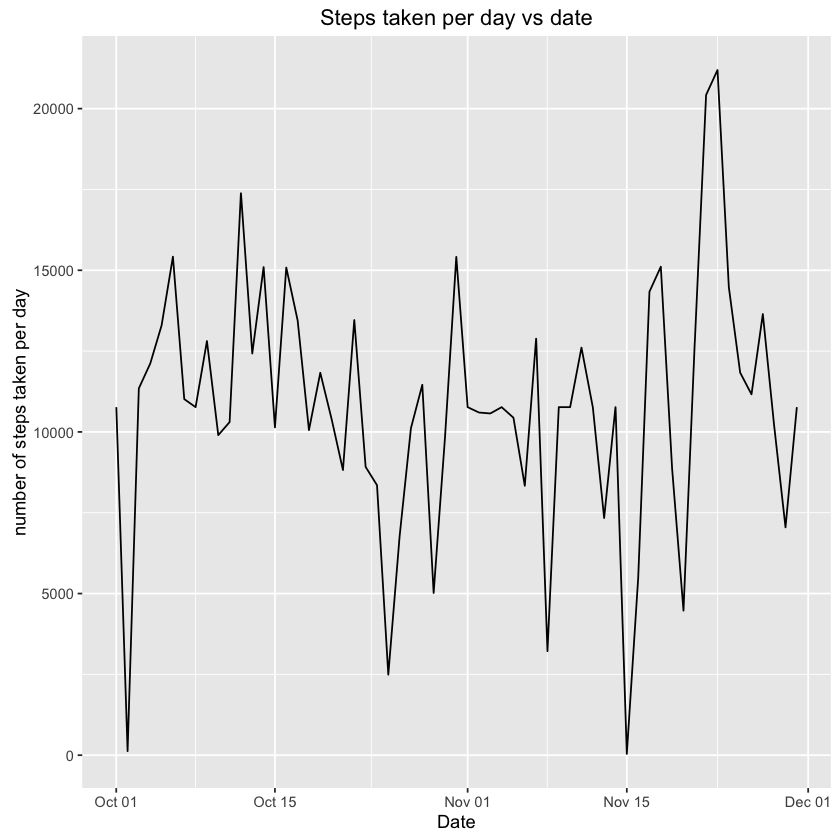

In [33]:
days2<-as.POSIXct(sum4$date)
library(ggplot2)
ggplot(data=sum4,aes(x=days2,y=steps))+geom_line()+xlab('Date')+ylab('number of steps taken per day')+
ggtitle('Steps taken per day vs date')

In [34]:
max(sum4$steps)
which.max(sum4$steps)

[1] 21194

[1] 54

In [35]:
mean(sum4$steps)
median(sum4$steps)

[1] 10766.19

[1] 10766.19

In [36]:
dat$date<-as.Date(dat$date)
weekdays1 <- c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday')

In [37]:
dat$wDay <- factor((weekdays(dat$date)%in%weekdays1), levels=c(FALSE, TRUE), labels=c('weekend', 'weekday')) 

In [38]:
head(dat)

,steps,date,interval,wDay
1,1.716981,2012-10-01,0,weekday
2,0.3396226,2012-10-01,5,weekday
3,0.1320755,2012-10-01,10,weekday
4,0.1509434,2012-10-01,15,weekday
5,0.0754717,2012-10-01,20,weekday
6,2.09434,2012-10-01,25,weekday


In [39]:
x1<-split(dat,dat$wDay)
head(x1[[1]])
head(x1[[2]])

,steps,date,interval,wDay
1441,0,2012-10-06,0,weekend
1442,0,2012-10-06,5,weekend
1443,0,2012-10-06,10,weekend
1444,0,2012-10-06,15,weekend
1445,0,2012-10-06,20,weekend
1446,0,2012-10-06,25,weekend


,steps,date,interval,wDay
1,1.716981,2012-10-01,0,weekday
2,0.3396226,2012-10-01,5,weekday
3,0.1320755,2012-10-01,10,weekday
4,0.1509434,2012-10-01,15,weekday
5,0.0754717,2012-10-01,20,weekday
6,2.09434,2012-10-01,25,weekday


In [40]:
days<-seq(as.Date('2012/10/01'),as.Date('2012/11/30'),by='day')
#length(days)
#weekdays(days)
sum(weekdays(days)=='Saturday'|weekdays(days)=='Sunday')
sum(weekdays(days)=='Sunday')

[1] 16

[1] 8

In [41]:
weekend.data<-x1[[1]]
weekday.data<-x1[[2]]

In [45]:
head(weekend.data)
head(weekday.data)

,steps,date,interval,wDay
1441,0,2012-10-06,0,weekend
1442,0,2012-10-06,5,weekend
1443,0,2012-10-06,10,weekend
1444,0,2012-10-06,15,weekend
1445,0,2012-10-06,20,weekend
1446,0,2012-10-06,25,weekend


,steps,date,interval,wDay
1,1.716981,2012-10-01,0,weekday
2,0.3396226,2012-10-01,5,weekday
3,0.1320755,2012-10-01,10,weekday
4,0.1509434,2012-10-01,15,weekday
5,0.0754717,2012-10-01,20,weekday
6,2.09434,2012-10-01,25,weekday


In [61]:
send.data<-aggregate(steps~interval,data=weekend.data, FUN=function(x)sum(x)/16)
sday.data<-aggregate(steps~interval,data=weekday.data, FUN=function(x) sum(x)/45)

In [65]:
send.data$wday<-"weekend"
sday.data$wday<-"weekday"
head(send.data)
head(sday.data)

,interval,steps,wday
1,0,0.2146226,weekend
2,5,0.04245283,weekend
3,10,0.01650943,weekend
4,15,0.01886792,weekend
5,20,0.009433962,weekend
6,25,3.511792,weekend


,interval,steps,wday
1,0,2.251153,weekday
2,5,0.445283,weekday
3,10,0.1731656,weekday
4,15,0.1979036,weekday
5,20,0.09895178,weekday
6,25,1.590356,weekday


In [66]:
fdf<-rbind(send.data,sday.data)
head(send.data)

,interval,steps,wday
1,0,0.2146226,weekend
2,5,0.04245283,weekend
3,10,0.01650943,weekend
4,15,0.01886792,weekend
5,20,0.009433962,weekend
6,25,3.511792,weekend


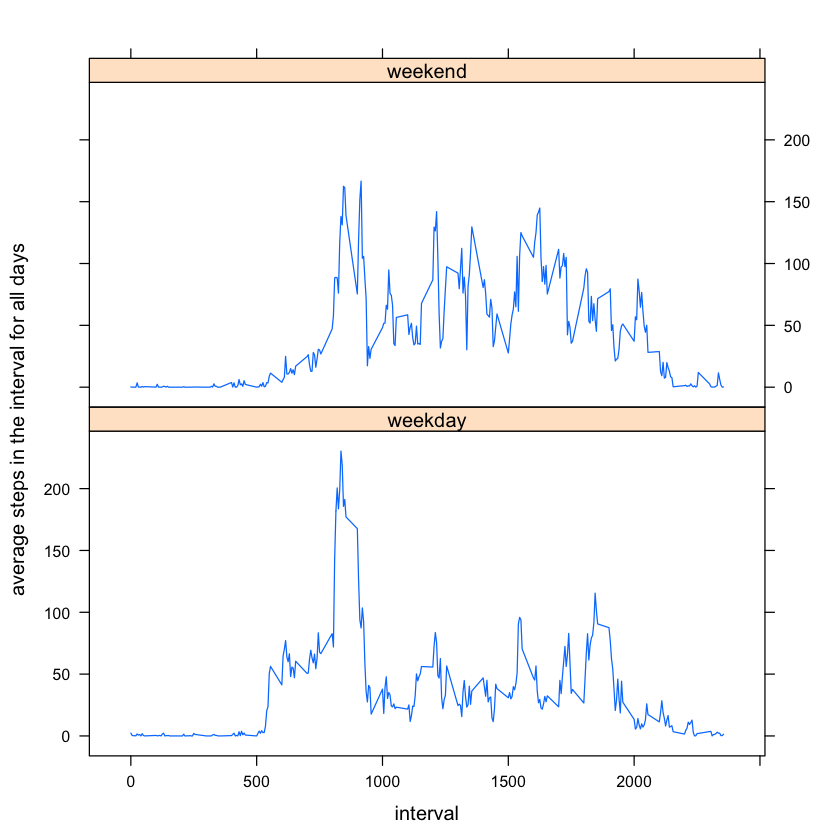

In [68]:
library(lattice)
xyplot(steps ~ interval |wday, data=fdf, layout = c(1, 2),type='l', xlab='interval',
       ylab='average steps in the interval for all days') 